# 2-Feature Selection- Correlation

In [58]:
# importing libraries
from sklearn.datasets import fetch_openml

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# Loading the Dataset
data = fetch_openml(name='boston', version=1, as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MEDV"] = data.target

In [60]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
data.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [62]:
X = df.drop("MEDV", axis=1)
y = df['MEDV']

In [63]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [64]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [65]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

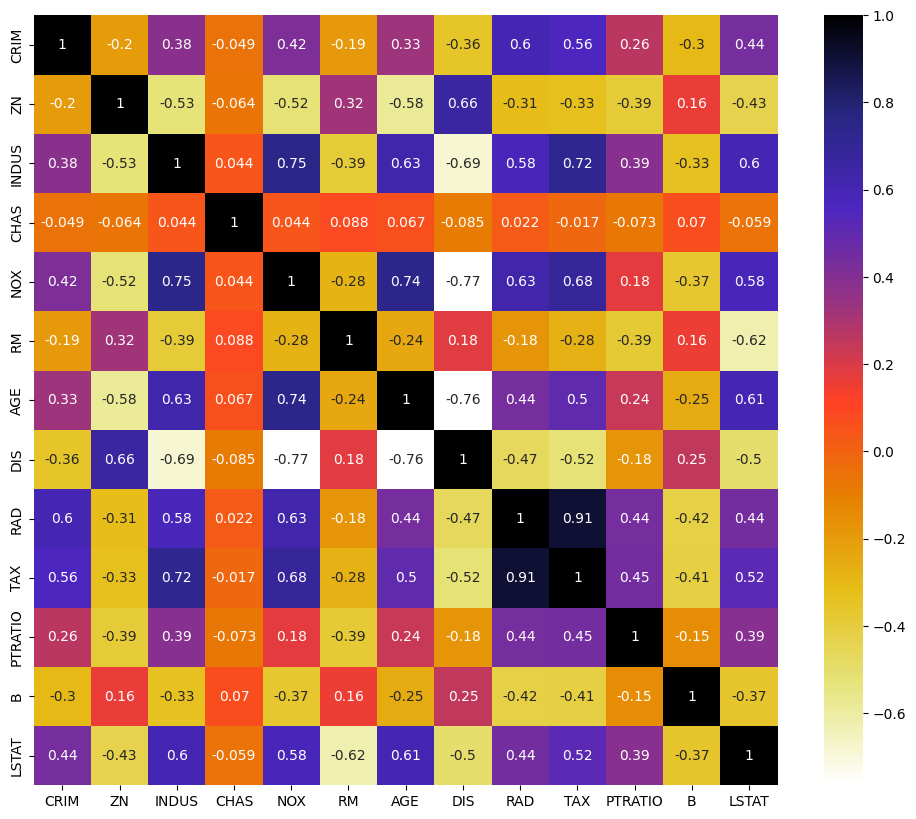

In [67]:
import seaborn as sns

# Using Person Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [68]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set() # sqt of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [69]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [70]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [71]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,6.333,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,7.147,3,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,6.193,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,5.277,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,6.635,4,18.4,396.90,4.54


### Let try with Big Dataset

https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv 

In [72]:
df=pd.read_csv('E:\\Data_Analysis_Datasets\\feature_selection_train.csv',nrows=10000)

X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

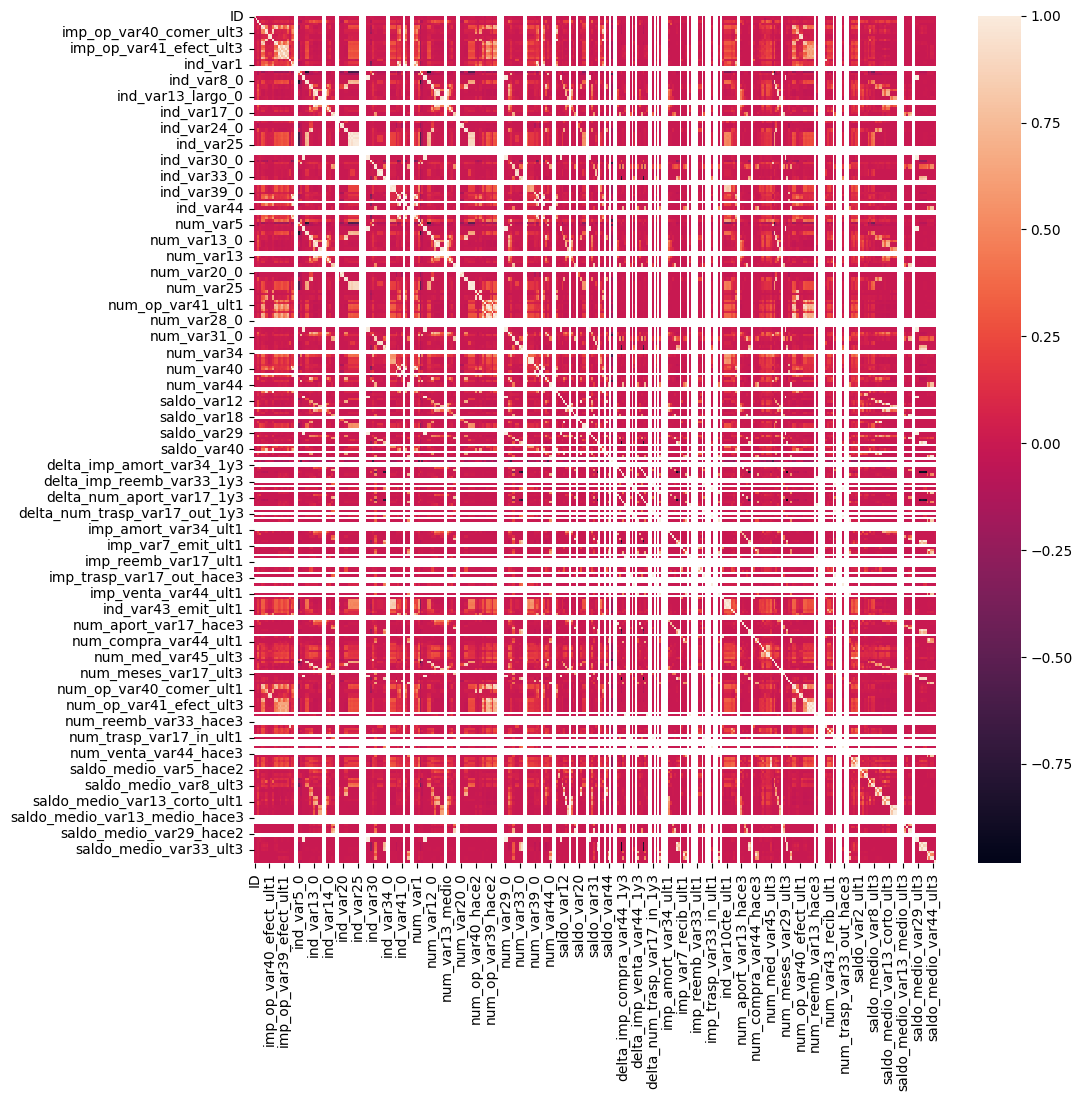

In [73]:
import seaborn as sns

#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.heatmap(corrmat)
plt.show()

In [74]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

193

In [75]:
corr_features

{'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_compra_var44_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 

In [77]:
X_train = X_train.drop(corr_features, axis=1)

In [78]:
X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,var38
7681,15431,2,42,840.0,4477.02,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,37491.21
9031,18181,2,31,0.0,52.32,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,106685.94
3691,7411,2,51,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,66144.66
202,407,2,36,0.0,0.00,0.0,0,0.0,0,0,...,2412.0,0,0,0,0,0.0,0.0,0.0,0,92121.36
5625,11280,2,23,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,117547.89
4859,9723,2,24,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,71050.83
3264,6557,2,24,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,141069.33
9845,19796,2,38,0.0,0.00,0.0,0,150.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,86412.15
